# Notebook Import

In [1]:
from os import walk
from os.path import join 
import pandas as pd
import nltk
import numpy as np
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# Constants

In [2]:
EXAMPLE_FILE = 'SpamData/01_Processing/practice_email.txt'
SPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_2'
EASY_NONSPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'
DATA_JSON = 'SpamData/01_Processing/email-text-data.json'
WHALE_ICON ='SpamData/01_Processing/wordcloud_resources/whale-icon.png'
SKULL_ICON ='SpamData/01_Processing/wordcloud_resources/skull-icon.png'
THUMBS_UP_ICON ='SpamData/01_Processing/wordcloud_resources/thumbs-up.png'
THUMBS_DOWN_ICON ='SpamData/01_Processing/wordcloud_resources/thumbs-down.png'
FONTSANS ='SpamData/01_Processing/wordcloud_resources/OpenSansCondensed-Bold.ttf'
VOCAB_SIZE = 2500
WORD_ID = 'SpamData/01_Processing/word-by-id.csv'

TRAINING_DATA = 'SpamData/02_Training/training-data.txt'

TEST_DATA = 'SpamData/02_Training/testing-data.txt'


# Reading Files

In [3]:
stream = open('SpamData/01_Processing/spam_assassin_corpus/spam_1/00249.5f45607c1bffe89f60ba1ec9f878039a')
message = stream.read()
stream.close()
print(type(message))
print(message)

<class 'str'>
From pamela4701@eudoramail.com  Mon Sep  9 10:51:29 2002
Return-Path: <pamela4701@eudoramail.com>
Delivered-To: zzzz@localhost.spamassassin.taint.org
Received: from localhost (jalapeno [127.0.0.1])
	by zzzzason.org (Postfix) with ESMTP id 5D14216F17
	for <zzzz@localhost>; Mon,  9 Sep 2002 10:49:04 +0100 (IST)
Received: from jalapeno [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Mon, 09 Sep 2002 10:49:04 +0100 (IST)
Received: from smtp-ft1.fr.colt.net (smtp-ft1.fr.colt.net [213.41.78.25])
    by dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g899AfC06863 for
    <webmaster@efi.ie>; Mon, 9 Sep 2002 10:10:41 +0100
Received: from mailsweeper.abc-arbitrage.com (mailhost2.abc-arbitrage.com
    [213.41.18.43]) by smtp-ft1.fr.colt.net with ESMTP id g899AvS20929 for
    <webmaster@efi.ie>; Mon, 9 Sep 2002 11:10:57 +0200
Received: from 210.214.94.76 (unverified) by mailsweeper.abc-arbitrage.com
    (Content Technologies SMTPRS 4.2.10) w

In [4]:
stream = open(EXAMPLE_FILE)

is_body = False
lines = []

for line in stream :
    if is_body :
        lines.append(line)
    elif line == '\n' :
        is_body = True
        
email_body= '\n'.join(lines)

stream.close()
email_body

'\n\nDear Mr Still\n\n\n\nGood tidings to you and all your staff for the festive season ahead (Christmas).\n\nNow to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa\'s Grotto" in your store.\n\nBut WAIT! You\'re probably thinking: "What makes him so special?"\n\nWell, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.\n\nYou will note also, from the enclosed sketch, that I have radically redesigned Santa\'s outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.\n\nI look forward to hearing from you.\n\n\n\nBest wishes\n\nRobin Cooper\n\n[Excerpt from 

# Generator Functions

In [5]:
def generate_squares(N):
    for i in range(N):
        yield i**2

In [6]:
for i in generate_squares(3):
    print(i,end=' ->')

0 ->1 ->4 ->

# Extracting Email body

In [7]:
def email_body_generator(path):
    for root , dirname , filename in walk(path):
        
        for file in filename:
            file_path = join(root,file)
            stream = open(file_path,encoding = 'Latin-1')

            is_body = False
            lines = []

            for line in stream :
                if is_body :
                    lines.append(line)
                elif line == '\n' :
                    is_body = True

            email_body = '\n'.join(lines)

            stream.close()
            yield file , email_body
        
    

In [8]:
def df_from_directory(path , classification):
    rows = []
    row_names = []
    for file , email_body in email_body_generator(path):
        rows.append({'MESSAGE':email_body,'CATEGORY':classification})
        row_names.append(file)
    return pd.DataFrame(rows,index = row_names)

In [9]:
spam_emails = df_from_directory(SPAM_1_PATH,1)
spam_emails = df_from_directory(SPAM_1_PATH,1)
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH,1))
spam_emails



,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
01397.f75f0dd0dd923faefa3e9cc5ecb8c906,This is a multi-part message in MIME format.\n...,1
01398.8ca7045aae4184d56e8509dc5ad6d979,"Dear Subscriber,\n\n\n\nIf I could show you a ...",1
01399.2319643317e2c5193d574e40a71809c2,****Mid-Summer Customer Appreciation SALE!****...,1
01400.b444b69845db2fa0a4693ca04e6ac5c5,ATTN:SIR/MADAN \n\n\n\n ...,1


In [10]:
non_spam_emails = df_from_directory(EASY_NONSPAM_1_PATH,0)
non_spam_emails = non_spam_emails.append(df_from_directory(EASY_NONSPAM_2_PATH,0))
non_spam_emails.shape
non_spam_emails

,MESSAGE,CATEGORY
00001.7c53336b37003a9286aba55d2945844c,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
00002.9c4069e25e1ef370c078db7ee85ff9ac,"Martin A posted:\n\nTassos Papadopoulos, the G...",0
00003.860e3c3cee1b42ead714c5c874fe25f7,Man Threatens Explosion In Moscow \n\n\n\nThur...,0
00004.864220c5b6930b209cc287c361c99af1,Klez: The Virus That Won't Die\n\n \n\nAlready...,0
00005.bf27cdeaf0b8c4647ecd61b1d09da613,"> in adding cream to spaghetti carbonara, whi...",0
...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0


In [11]:
data = pd.concat([spam_emails,non_spam_emails])
data.shape

(5799, 2)

# Cleaning Data

In [12]:
data['MESSAGE'].isnull().values.any()

False

In [13]:
#check for empty emails
w = []
for i in range(len(data['MESSAGE'])):
    if len(data['MESSAGE'][i]) == 0:
        w.append(i)
        

In [14]:
data[data.MESSAGE.str.len()==0].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

In [15]:
# remove system files

data = data.drop(['cmds',])

In [16]:
data[data.MESSAGE.str.len()==0].index

Index([], dtype='object')

In [17]:
data.shape

(5796, 2)

In [18]:
# Add document ids

document_ids = range(0,len(data))

In [19]:
document_ids

range(0, 5796)

In [20]:
data['DOC_ID'] = document_ids
data

,MESSAGE,CATEGORY,DOC_ID
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,0
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,2
00004.eac8de8d759b7e74154f142194282724,##############################################...,1,3
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1,4
...,...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,5791
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0,5792
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,5793
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,5794


In [21]:
data['FILE_NAME'] = data.index
data
data.set_index('DOC_ID',inplace = True)

In [22]:

data

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d
...,...,...,...
5791,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5792,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5793,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676


# Save to File

In [23]:
data.to_json(DATA_JSON)

In [24]:
# NUmber of spam messages
data['CATEGORY'].value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [25]:
amount_spam = data['CATEGORY'].value_counts()[1]
amount_non_spam = data['CATEGORY'].value_counts()[0]

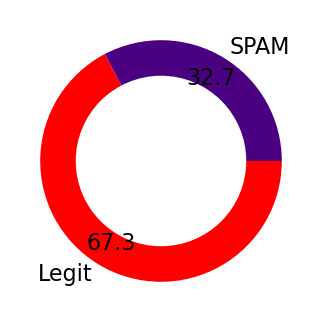

In [26]:
category_names = ['SPAM','Legit']
sizes  = [amount_spam,amount_non_spam]
plt.figure(dpi = 100)
plt.pie(sizes,labels=category_names,textprops = {'fontsize':16},autopct = '%.1f',colors = ['indigo','RED'],pctdistance = 0.8)
centre_circle = plt.Circle((0,0),radius = 0.7,color = 'white')
plt.gca().add_artist(centre_circle,)
plt.show()

# Natural Language Processing

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ajinkya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## NLTK download

In [28]:
# tokenizing means splitting 
msg = 'hi I am Ajinkya. I am playing and waiting for cricket'
word_tokenize(msg)

['hi',
 'I',
 'am',
 'Ajinkya',
 '.',
 'I',
 'am',
 'playing',
 'and',
 'waiting',
 'for',
 'cricket']

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ajinkya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
stop_words = set(stopwords.words('english'))

In [31]:
type(stop_words)

set

In [32]:
words = word_tokenize(msg.lower())
filtered_words = []
for word in words:
    if word not in stop_words and  word.isalpha():
        stemmed_word = PorterStemmer().stem(word)
        filtered_words.append(stemmed_word)
        
filtered_words        


# remove pinctuation

['hi', 'ajinkya', 'play', 'wait', 'cricket']

In [33]:
# Removing HTML tags
x = data['MESSAGE'][0]
soup = BeautifulSoup(x,'html.parser')
soup.prettify()
soup.get_text()

"\n\n\n\n\n\n\n\n\n\n\n\n\n\n<=\n\n/TR>\nSave up to 70% on Life Insurance.\nWhy Spend More Than You Have To?\n\n\nLife Quote Savings\n\n\n\n\n\n\n\n\n\n\n\nEnsurin=\n\ng your \n\n      family's financial security is very important. Life Quote Savings ma=\n\nkes \n\n      buying life insurance simple and affordable. We Provide FREE Access =\n\nto The \n\n      Very Best Companies and The Lowest Rates.\n\n\n\n\n\nLife Quote Savings is FAST, EAS=\n\nY and \n\n            SAVES you money! Let us help you get started with the best val=\n\nues in \n\n            the country on new coverage. You can SAVE hundreds or even tho=\n\nusands \n\n            of dollars by requesting a FREE quote from Lifequote Savings. =\n\nOur \n\n            service will take you less than 5 minutes to complete. Shop an=\n\nd \n\n            compare. SAVE up to 70% on all types of Life insurance! \n\n\n\n\nClick Here For Your=\n\n \n\n            Free Quote!\n\nProtecting your family is the best investment you'll 

In [34]:
# function for email processing


def clean_message(message,stemmer = PorterStemmer(),stop_words = set(stopwords.words('english'))):
    filtered_words = []
    soup = BeautifulSoup(message,'html.parser')
    soup.prettify()
    message = soup.get_text()
    words = word_tokenize(message.lower())
    
    for word in words:
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    return filtered_words

In [35]:
clean_message(email_body)

['dear',
 'mr',
 'still',
 'good',
 'tide',
 'staff',
 'festiv',
 'season',
 'ahead',
 'christma',
 'crux',
 'fulli',
 'qualifi',
 'santa',
 'clau',
 'wonder',
 'whether',
 'might',
 'consid',
 'run',
 'santa',
 'grotto',
 'store',
 'wait',
 'probabl',
 'think',
 'make',
 'special',
 'well',
 'first',
 'made',
 'sever',
 'chang',
 'characteris',
 'father',
 'christma',
 'rather',
 'greet',
 'children',
 'shout',
 'ho',
 'ho',
 'ho',
 'prefer',
 'whisper',
 'phrase',
 'depend',
 'unfathom',
 'cruel',
 'world',
 'live',
 'addit',
 'gift',
 'rang',
 'felt',
 'hoop',
 'holder',
 'note',
 'also',
 'enclos',
 'sketch',
 'radic',
 'redesign',
 'santa',
 'outfit',
 'renam',
 'charact',
 'lord',
 'buckl',
 'would',
 'interest',
 'employ',
 'promis',
 'never',
 'let',
 'look',
 'forward',
 'hear',
 'best',
 'wish',
 'robin',
 'cooper',
 'excerpt',
 'book',
 'timewast',
 'letter',
 'robin',
 'cooper']

# Apply cleaning function

In [36]:
nested_list = data['MESSAGE'].apply(clean_message)
len(nested_list)

C:\Users\Ajinkya\anaconda3\lib\site-packages\bs4\__init__.py:414: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


5796

In [37]:
nested_list.head()

DOC_ID
0    [save, life, insur, spend, life, quot, save, g...
1    [fight, risk, cancer, http, slim, guarante, lo...
2    [fight, risk, cancer, http, slim, guarante, lo...
3    [adult, club, offer, free, membership, instant...
4    [thought, might, like, slim, guarante, lose, l...
Name: MESSAGE, dtype: object

In [38]:
doc_id_spam = data[data['CATEGORY']==1].index
doc_id_nonspam = data[data['CATEGORY']==0].index

In [39]:
nested_list_nonspam = nested_list.loc[doc_id_nonspam]
nested_list_spam =  nested_list.loc[doc_id_spam]

In [40]:
nested_list_spam

DOC_ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
1891    [want, boss, train, home, studi, thousand, peo...
1892    [messag, mime, format, prefer, doctor, order, ...
1893    [dear, subscrib, could, show, way, get, visito...
1894    [custom, appreci, sale, express, appreci, loya...
1895    [attn, strictli, confidenti, pleas, introduc, ...
Name: MESSAGE, Length: 1896, dtype: object

In [41]:
spam_words = []
for sublist in nested_list_spam:
    for item in sublist:
        spam_words.append(item)
spammy_words = pd.Series(spam_words).value_counts()
spammy_words.shape
spammy_words[:10]

http      3097
email     3090
free      2585
click     2058
receiv    1989
list      1971
get       1914
pleas     1852
busi      1792
order     1746
dtype: int64

In [42]:
nonspam_words = []
for sublist in nested_list_nonspam:
    for item in sublist:
        nonspam_words.append(item)
normal_words = pd.Series(nonspam_words).value_counts()
normal_words.shape

(20815,)

In [43]:
normal_words

http         7563
use          3633
list         2880
one          2373
get          2286
             ... 
giggl           1
antiboyot       1
nytim           1
rommi           1
ingerson        1
Length: 20815, dtype: int64

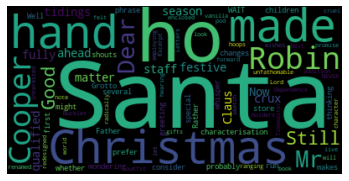

In [44]:
word_cloud = WordCloud().generate(email_body)
plt.imshow(word_cloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [45]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Ajinkya\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [46]:
nltk.download('shakespeare')

[nltk_data] Downloading package shakespeare to
[nltk_data]     C:\Users\Ajinkya\AppData\Roaming\nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!


True

In [47]:
gut = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
gut = ' '.join(gut)
type(gut)

str

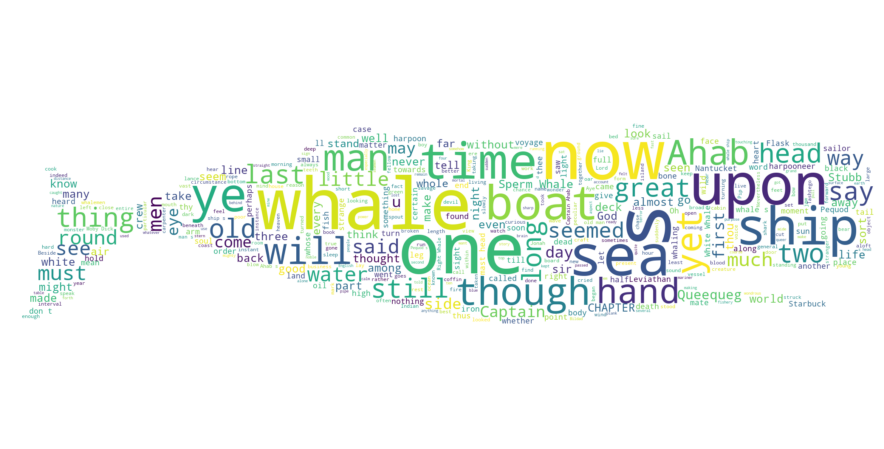

numpy.ndarray

In [48]:

icon = Image.open(WHALE_ICON)
image_mask = Image.new(mode='RGB',size = icon.size,color = (255,255,255))
image_mask.paste(icon,box = icon)
rgb_array = np.array(image_mask)
plt.figure(figsize = (16,8))

word_cloud = WordCloud(mask = rgb_array,background_color='white',max_words=400).generate(gut)
plt.imshow(word_cloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()
type(rgb_array)

In [49]:
ham = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')
ham = ' '.join(ham)
type(gut)

str

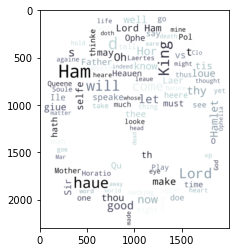

In [50]:

# Not understood code

skull = Image.open(SKULL_ICON)
skull_image = Image.new(mode = 'RGB',size = skull.size,color = (255,255,255))
skull_image.paste(skull,box = skull)
mask = np.array(skull_image)
wc = WordCloud(background_color='white',mask = mask,colormap = 'bone',max_words = 100)
plt.imshow(wc.generate(ham),interpolation = 'bilinear')

# Wordcloud of Spam and Nonspam

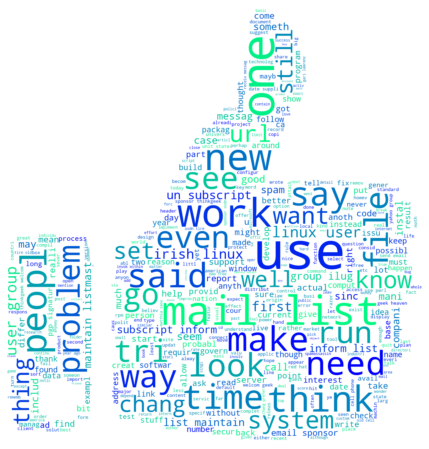

numpy.ndarray

In [51]:
icon = Image.open(THUMBS_UP_ICON)
image_mask = Image.new(mode='RGB',size = icon.size,color = (255,255,255))
image_mask.paste(icon,box = icon)
rgb_array = np.array(image_mask)
plt.figure(figsize = (16,8))

ham_str = ' '.join(nonspam_words)

word_cloud = WordCloud(mask = rgb_array,background_color='white',max_words=400,colormap = 'winter').generate(ham_str)
plt.imshow(word_cloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()
type(rgb_array)

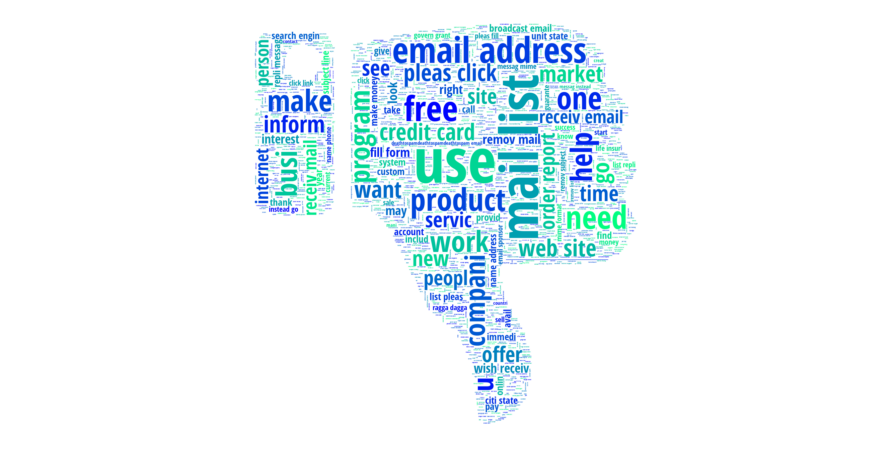

numpy.ndarray

In [52]:
icon = Image.open(THUMBS_DOWN_ICON)
image_mask = Image.new(mode='RGB',size = icon.size,color = (255,255,255))
image_mask.paste(icon,box = icon)
rgb_array = np.array(image_mask)
plt.figure(figsize = (16,8))

spam_str = ' '.join(spam_words)

word_cloud = WordCloud(mask = rgb_array,background_color='white',max_words=2000,colormap = 'winter',font_path = FONTSANS).generate(spam_str)
plt.imshow(word_cloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()
type(rgb_array)

# Generate Vocabulary

In [89]:
stemmed_nested_list = data['MESSAGE'].apply(clean_message)
stemmed_nested_list.head()

C:\Users\Ajinkya\anaconda3\lib\site-packages\bs4\__init__.py:414: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


DOC_ID
0    [save, life, insur, spend, life, quot, save, g...
1    [fight, risk, cancer, http, slim, guarante, lo...
2    [fight, risk, cancer, http, slim, guarante, lo...
3    [adult, club, offer, free, membership, instant...
4    [thought, might, like, slim, guarante, lose, l...
Name: MESSAGE, dtype: object

In [91]:
flat_list = []
for sublist in stemmed_nested_list:
    for item in sublist:
        flat_list.append(item)


In [55]:
unique_words = pd.Series(flat_list).value_counts()
frequent_words = unique_words[0:VOCAB_SIZE]
frequent_words[0:10]

http     10660
use       5019
list      4851
email     4367
get       4200
mail      3983
one       3907
free      3202
time      3042
work      2883
dtype: int64

In [56]:
word_ids = list(range(0,VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORDS':frequent_words.index},index = word_ids)

In [57]:
vocab.index.name = "Word Id"

In [58]:
vocab.to_csv(WORD_ID,index_label= vocab.index.name,header = 'VOCAB_WORDS')

In [59]:
# Useless
def present(str,vocab):
    if str in vocab:
        return True
    else:
        return False
vocab.iat[335,0]

'instruct'

In [60]:
'app' in set(vocab["VOCAB_WORDS"])

True

In [61]:
'mach' in set(unique_words)

False

In [62]:
longest_mail =  max(stemmed_nested_list,key = len)
longest_mail_index = max(stemmed_nested_list,key = len).index

In [63]:
#stemmed_nested_list["DOC_ID"==longest_mail_index]
len(longest_mail)
x =0
for k in range(len(stemmed_nested_list)):
    if len(stemmed_nested_list[k])==len(longest_mail):
        x = k
x

5775

In [64]:
data['MESSAGE'][5775]

'------------------------ Yahoo! Groups Sponsor ---------------------~-->\n\n4 DVDs Free +s&p Join Now\n\nhttp://us.click.yahoo.com/pt6YBB/NXiEAA/Ey.GAA/26EolB/TM\n\n---------------------------------------------------------------------~->\n\n\n\nA new version of unison is now available for testing.  It incorporates\n\nseveral small improvements over 2.9.1, but the main change is a fix to\n\na bug that had potentially serious safety consequences, but only for\n\nthe very small number of users that are in the habit of running more\n\nthan one instance of Unison at a time, in parallel.  These users are\n\nstrongly encouraged to upgrade.  Others can wait if they wish.\n\n\n\nThe release includes pre-built executables for Linux and Solaris, but\n\nnot Windows.  (We are looking for a Unison-Windows maintainer -- at\n\nthe moment, none of the active developers are regularly using Unison\n\non Windows, and we do not have a machine that is configured properly\n\nfor building executables for exp

In [94]:
(stemmed_nested_list.tolist())[:5]

[['save',
  'life',
  'insur',
  'spend',
  'life',
  'quot',
  'save',
  'g',
  'famili',
  'financi',
  'secur',
  'import',
  'life',
  'quot',
  'save',
  'ke',
  'buy',
  'life',
  'insur',
  'simpl',
  'afford',
  'provid',
  'free',
  'access',
  'best',
  'compani',
  'lowest',
  'rate',
  'life',
  'quot',
  'save',
  'fast',
  'save',
  'money',
  'let',
  'us',
  'help',
  'get',
  'start',
  'best',
  'ue',
  'countri',
  'new',
  'coverag',
  'save',
  'hundr',
  'even',
  'usand',
  'dollar',
  'request',
  'free',
  'quot',
  'lifequot',
  'save',
  'servic',
  'take',
  'less',
  'minut',
  'complet',
  'shop',
  'compar',
  'save',
  'type',
  'life',
  'insur',
  'click',
  'free',
  'quot',
  'protect',
  'famili',
  'best',
  'invest',
  'r',
  'make',
  'receipt',
  'email',
  'error',
  'wish',
  'remov',
  'list',
  'pleas',
  'click',
  'type',
  'remov',
  'resid',
  'state',
  'prohibit',
  'solicit',
  'ce',
  'pleas',
  'disregard',
  'email'],
 ['fight',
  

In [66]:
word_columns = pd.DataFrame.from_records(data = stemmed_nested_list.tolist(),)

In [67]:
word_columns

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
0,save,life,insur,spend,life,quot,save,g,famili,financi,...,None,None,None,None,None,None,None,None,None,None
1,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
2,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
3,adult,club,offer,free,membership,instant,access,site,user,name,...,None,None,None,None,None,None,None,None,None,None
4,thought,might,like,slim,guarante,lose,lb,day,http,fight,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,http,bizarr,collect,stuf,anim,could,fetch,sold,cornwal,museum,...,None,None,None,None,None,None,None,None,None,None
5792,care,use,one,also,realli,cute,thing,japanes,av,girl,...,None,None,None,None,None,None,None,None,None,None
5793,sm,skip,montanaro,write,jeremi,put,anoth,way,interest,hear,...,None,None,None,None,None,None,None,None,None,None
5794,mark,hammond,like,given,zodb,sound,attract,would,packag,hundr,...,None,None,None,None,None,None,None,None,None,None


In [68]:
x_train, x_test, y_train, y_test = train_test_split( word_columns, data['CATEGORY'], test_size=0.3, random_state=42)

In [69]:
x_train.index.name = x_test.index.name = 'DOC_ID'
y_train.index.name = y_test.index.name = 'DOC_ID'

x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4844,ye,inde,agent,directori,verita,cd,unix,subdirectori,file,call,...,None,None,None,None,None,None,None,None,None,None
4727,problem,come,tri,instal,harddissssk,like,alreadi,mount,http,yahoo,...,None,None,None,None,None,None,None,None,None,None
5022,origin,messag,date,mon,aug,chad,norwood,sven,cc,subject,...,None,None,None,None,None,None,None,None,None,None
3504,inlin,folk,sever,major,internet,outag,morn,across,major,provid,...,None,None,None,None,None,None,None,None,None,None
3921,url,http,date,bath,chronicl,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [70]:
# Create a sparse matrix for data
word_index = pd.Index(vocab["VOCAB_WORDS"])
word_index

Index(['http', 'use', 'list', 'email', 'get', 'mail', 'one', 'free', 'time',
       'work',
       ...
       'scenario', 'maxaman', 'potent', 'murjel', 'council', 'invalid',
       'cloth', 'analog', 'combat', 'difficulti'],
      dtype='object', name='VOCAB_WORDS', length=2500)

In [71]:
type(word_index)
word_index
x_train[393]
vocab["VOCAB_WORDS"].head(338)

Word Id
0          http
1           use
2          list
3         email
4           get
         ...   
333         act
334         age
335    instruct
336        lead
337       small
Name: VOCAB_WORDS, Length: 338, dtype: object

In [72]:
def make_sparse_matrix(df,indexed_words,labels):
    
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_cols):
            
            word = df.iat[i, j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'DOC_ID': doc_id,
                       'OCCURENCE': 1, 'WORD_ID': word_id}
                
                dict_list.append(item)
    
    return pd.DataFrame(dict_list)

In [73]:
%%time
sparse_train = make_sparse_matrix(x_train,word_index,y_train)

Wall time: 2min 22s


In [74]:
sparse_train[-5:]


,LABEL,DOC_ID,OCCURENCE,WORD_ID
429231,1,860,1,47
429232,1,860,1,1433
429233,1,860,1,26
429234,1,860,1,21
429235,1,860,1,126


In [75]:
trained_grouped = sparse_train.groupby(['DOC_ID','WORD_ID','LABEL']).sum()

In [76]:
vocab['VOCAB_WORDS'][7] 

'free'

In [77]:
data['MESSAGE'][0]

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">\n\n<HTML><HEAD>\n\n<META content=3D"text/html; charset=3Dwindows-1252" http-equiv=3DContent-T=\n\nype>\n\n<META content=3D"MSHTML 5.00.2314.1000" name=3DGENERATOR></HEAD>\n\n<BODY><!-- Inserted by Calypso -->\n\n<TABLE border=3D0 cellPadding=3D0 cellSpacing=3D2 id=3D_CalyPrintHeader_ r=\n\nules=3Dnone \n\nstyle=3D"COLOR: black; DISPLAY: none" width=3D"100%">\n\n  <TBODY>\n\n  <TR>\n\n    <TD colSpan=3D3>\n\n      <HR color=3Dblack noShade SIZE=3D1>\n\n    </TD></TR></TD></TR>\n\n  <TR>\n\n    <TD colSpan=3D3>\n\n      <HR color=3Dblack noShade SIZE=3D1>\n\n    </TD></TR></TBODY></TABLE><!-- End Calypso --><!-- Inserted by Calypso=\n\n --><FONT \n\ncolor=3D#000000 face=3DVERDANA,ARIAL,HELVETICA size=3D-2><BR></FONT></TD><=\n\n/TR></TABLE><!-- End Calypso --><FONT color=3D#ff0000 \n\nface=3D"Copperplate Gothic Bold" size=3D5 PTSIZE=3D"10">\n\n<CENTER>Save up to 70% on Life Insurance.</CENTER></FONT><FONT color=3D#ff=\n\n0000

In [78]:
trained_grouped

OCCURENCE
DOC_ID WORD_ID LABEL           
0      2       1              1
       3       1              2
       4       1              1
       7       1              3
       11      1              1
...                         ...
5795   2031    0              1
       2037    0              2
       2276    0              1
       2331    0              1
       2354    0              1

[258369 rows x 1 columns]

In [79]:
np.savetxt(TRAINING_DATA,trained_grouped.reset_index(),fmt = '%d')

In [80]:
sparse_test = make_sparse_matrix(x_test,word_index,y_test)

In [81]:
test_grouped = sparse_test.groupby(['DOC_ID','WORD_ID','LABEL']).sum().reset_index()

In [82]:
trained_grouped.reset_index()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,0,2,1,1
1,0,3,1,2
2,0,4,1,1
3,0,7,1,3
4,0,11,1,1
...,...,...,...,...
258364,5795,2031,0,1
258365,5795,2037,0,2
258366,5795,2276,0,1
258367,5795,2331,0,1


In [83]:
np.savetxt(TEST_DATA,test_grouped,fmt = '%d')

In [84]:
train_grouped = trained_grouped.reset_index()
train_doc_ids = set(train_grouped.DOC_ID)
test_doc_ids = set(test_grouped.DOC_ID)

In [85]:
set(x_test.index.values) - test_doc_ids # Excluded emails after pre-processing

{134, 179, 240, 274, 298, 339, 439, 471, 670, 734, 765, 945, 1544, 1670, 1700}

In [86]:
data['MESSAGE'][134]

'------=_NextPart_000_00E8_85C13B1D.B7243B86\n\nContent-Type: text/html; charset="iso-8859-1"\n\nContent-Transfer-Encoding: base64\n\n\n\n\n\nPGh0bWw+DQoNCjxib2R5IGJnY29sb3I9IiNGRkZGRkYiIHRleHQ9IiMwMDAw\n\nMDAiPiANCjxwIGFsaWduPSJjZW50ZXIiPjxhIGhyZWY9Imh0dHA6Ly93d3cu\n\nZGlyZWN0d2Vic3RvcmUuY29tL3RveXMvaW5kZXguaHRtbCI+PGltZyBzcmM9\n\nImh0dHA6Ly93d3cuZGlyZWN0d2Vic3RvcmUuY29tL21waWMuanBnIiB3aWR0\n\naD0iNTAwIiBoZWlnaHQ9IjMzOSIgYm9yZGVyPSIwIj48L2E+PGJyPiANCjxm\n\nb250IHNpemU9IjMiIGZhY2U9IkFyaWFsLCBIZWx2ZXRpY2EsIHNhbnMtc2Vy\n\naWYiPjxhIGhyZWY9Imh0dHA6Ly93d3cuZGlyZWN0d2Vic3RvcmUuY29tL3Rv\n\neXMvaW5kZXguaHRtbCI+PGI+RU5URVIgDQpOT1cgaWYgeW91IGFyZSAxOCBh\n\nbmQgb3ZlcjwvYj48L2E+PC9mb250PjwvcD4gDQo8cCBhbGlnbj0iY2VudGVy\n\nIj48Zm9udCBmYWNlPSJBcmlhbCwgSGVsdmV0aWNhLCBzYW5zLXNlcmlmIiBz\n\naXplPSI0IiBjb2xvcj0iI0ZGMDAwMCI+PGI+U1BFQ0lBTCANCk9GRkVSPGJy\n\nPiANCjxmb250IHNpemU9IjUiPjMwIERheXMgPGk+RlJFRSBhY2Nlc3M8L2k+\n\nIDwvZm9udD48YnI+IA0KdG8gdGhlIGxhcmdlc3QgQWR1bHRzaXRlIG9uIHRo\n\nZSB3ZWIuPGJyPiANCjwvYj4gPG

In [87]:
print(clean_message(data['MESSAGE'][134]))

[]


In [88]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4675,interest,alway,wonder,thing,bad,exampl,goto,languag,support,goto,...,None,None,None,None,None,None,None,None,None,None
4220,url,http,date,final,gdc,europ,review,confernec,session,ect,...,None,None,None,None,None,None,None,None,None,None
2484,stephen,william,mailto,swilliam,weaken,food,transact,argument,note,neighborhood,...,None,None,None,None,None,None,None,None,None,None
2418,el,mon,sep,bitbitch,wrote,eugen,mani,homo,friend,lover,...,None,None,None,None,None,None,None,None,None,None
5110,music,school,joke,american,conductor,european,conductor,talk,european,conductor,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5295,thu,jul,joseph,barrera,iii,wrote,chri,arkenberg,wrote,cheer,...,None,None,None,None,None,None,None,None,None,None
5740,securityfocu,linux,newslett,newslett,sponsor,securityfocu,deepsight,threat,manag,system,...,None,None,None,None,None,None,None,None,None,None
5069,thu,jul,matthia,saou,wrote,upon,time,matthia,wrote,see,...,None,None,None,None,None,None,None,None,None,None
